# Python for Engineering Statistics

## Dr.َAmir Ahmadi Javid


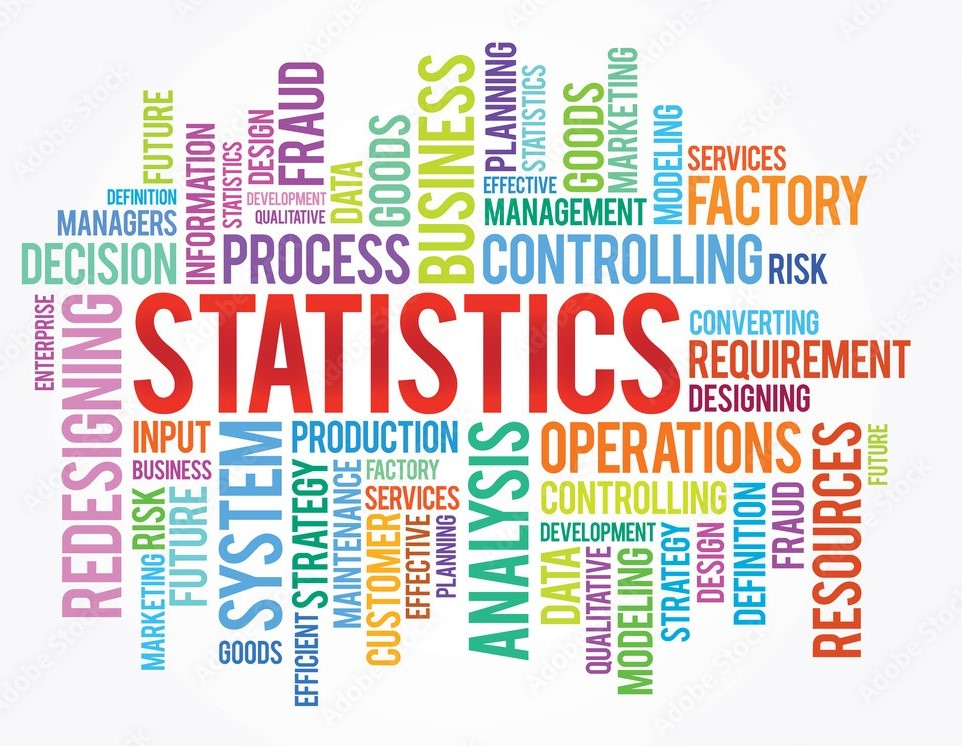
### By: Pedram Peiro & Mahdi Mohammadi


# About This Dataset

This dataset contains information about some of the titanic passengers. You are here to do some analysis on this dataset. Also meaning of each column (what they are referring to) is shown below:
<img src="Picture1.png" alt="Drawing" style="width: 500px;"/>

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Some Important Notes to Answer The Questions

1. Answer each of the questions in only one cell with the specified structure which is written above the question.
2. Your output should be exactly in the same way as it is mentioned in each question, otherwise you may lose score by mistake.
3. Try to keep your code as clean as possible.
4. Don't forget that the dataset might be messy and you have to clean it first!
5. **DO NOT** print anything unless it is said so.
6. Do all the changes in the notebook (not in MS Excel or any other environment).
7. Essential inputs are predefined in each function. Only use them. **DO NOT** add any other inputs.

## Import Libraries

In [1]:
# Don't change this cell.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook

#### import your dataset here

In [2]:
df = pd.read_csv(r"D:\uni\Teaching Assistant\Engineering Statistics\Python\Assignments\Assignment 2\Descriptive Statistics\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",man,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",man,35.0,0,0,373450,8.0500,NaN,S


## Question 1
In this question, you should change the index with a proper column in the dataset, also you should add a new column named "Family" which is the number of family members for each of the passengers.

The name of the columns are a bit messy (extra spaces in the names), fix them.

Also *Sex* column is a bit messy too (the unique values of this column is male, man, female, woman). Change _man_ to _male_, and _woman_ to _female_.

Write your code in the following function named "answer_one".

This function should return a **dataframe** with twelve columns.

In [3]:
def answer_one(df):
    
    # changing the index
    df = df.set_index('PassengerId')
    
    # Family columns
    df['Family'] = df['SibSp'] + df['Parch']
    
    
    # cleaning column names
    cols=[]
    for x in df.columns:
        cols.append(x.strip())
        
    df.columns= cols
    
    # man and woman fixing
    df['Sex'] = df['Sex'].replace('man' , 'male')
    df['Sex'] = df['Sex'].replace('woman' , 'female')
    return df

In [4]:
# Don't change this cell.
df = answer_one(df)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Question 2
Does this dataset contain any Null Values?

If it does, return the name of the columns which have null values as a *List* (not an array or any other data type), otherwise just return an empty List.

This function should return a **list**.

In [5]:
def answer_two(df):
    
    
    nan_lis = list(df.columns[df.isna().any()])
    
    
    return nan_lis

In [6]:
# Don't change this cell.
answer_two(df)

['Age', 'Cabin', 'Embarked']

## Question 3
First of all, fill the Null values in *Age* and *Fare* columns with the mean of these columns. (If they contain null values)


Then, using Describe method, describe **Fare** and **Age** columns.

This function should return a **dataframe** with two columns "Fare" and "Age" (respectively) and 8 rows.

In [7]:
def answer_three(df):
    
    
    df['Age'] = df['Age'].fillna(np.nanmean(df['Age']))
    
    
    return df[['Fare' , 'Age']].describe()

In [8]:
# Don't change this cell.
answer_three(df)

,Fare,Age
count,891.000000,891.000000
mean,32.204208,29.699118
std,49.693429,13.002015
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,29.699118
75%,31.000000,35.000000
max,512.329200,80.000000


## Question 4
In this part, you should calculate some essential info about the survivors:

1. `survivors`: *percentage of survivors in Titanic.*
2. `fem_survivors`: *percentage of survivors in Titanic who were female.*
3. `age_group_1`: *percentage of survivors who were twenty or younger*
4. `age_group_2`: *percentage of survivors who were fifty or younger and older than twenty*
5. `age_group_3`: *percentage of survivors who were older than fifty*
6. `Southampton`: *percentage of survivors embarked from Southampton*
7. `Cherbourg`: *percentage of survivors embarked from Cherbourg*
8. `Queenstown`: *percentage of survivors embarked from Queenstown*

This function should return a **dictionary** with eight keys (mentioned above) and their values (that you should calculate) respectively. Don't forget that the value of each key in the dictionary should be an **integer** (not float) which is rounded to its nearest integer (for example 14.3 to 14 or 45.5 to 46)

**NOTE**: DO NOT USE % SIGN. JUST RETURN THE INTEGER.

In [9]:
def answer_four(df):
    
    survivors = round(np.mean(df['Survived']) * 100)

    
    fem_survivors = round((sum(
        (df[df['Sex'] == 'female'])['Survived']) / sum(df['Survived'])) * 100)
    
    age_group_1 = round((sum(
        (df[df['Age'] <= 20])['Survived']) / sum(df['Survived'])) * 100)
    
    age_group_2 = round((sum(
        (df[(df['Age'] > 20) & (df['Age'] <= 50)])['Survived']) /
                         sum(df['Survived'])) * 100)
    
    age_group_3 = round((sum(
        (df[df['Age'] > 50])['Survived']) / sum(df['Survived'])) *
                        100)    
    
    Southampton = round((sum((df[df['Embarked'] == 'S'])['Survived']) / sum(df['Survived'])) * 100)
    Cherbourg= round((sum((df[df['Embarked'] == 'C'])['Survived']) / sum(df['Survived'])) * 100)
    Queenstown= round((sum((df[df['Embarked'] == 'Q'])['Survived']) / sum(df['Survived'])) * 100)
    
    dic = {'survivors': survivors ,'fem_survivors': fem_survivors, 'age_group_1':age_group_1 , 
           'age_group_2':age_group_2 , 'age_group_3': age_group_3, 'Southampton':Southampton , 
           'Cherbourg':Cherbourg , 'Queenstown':Queenstown}
    
    return dic

In [10]:
answer_four(df)

{'survivors': 38,
 'fem_survivors': 68,
 'age_group_1': 24,
 'age_group_2': 70,
 'age_group_3': 6,
 'Southampton': 63,
 'Cherbourg': 27,
 'Queenstown': 9}

## Question 5
Plot a grouped bar chart that shows the **number** of men and women embarked from **Southampton**, **Cherbourg** and **Queenstown**.

X axis of this plot should be these ports of embarkation respectively, and y axis is number.

Remember that you should specify which bars are for men and which ones are for women.

Add **necessary** components to your plot. (This part has score, so do your best.)

**Hint**: Don't forget googling.

This function should return a **figure**.

In [11]:
def answer_five(df):
    
    Southampton_male = len(df[(df['Sex'] =='male') & (df['Embarked'] =='S')])
    Cherbourg_male = len(df[(df['Sex'] =='male') & (df['Embarked'] =='C')])
    Queenstown_male = len(df[(df['Sex'] =='male') & (df['Embarked'] =='Q')])
    
    Southampton_female = len(df[(df['Sex'] =='female') & (df['Embarked'] =='S')])
    Cherbourg_female = len(df[(df['Sex'] =='female') & (df['Embarked'] =='C')])
    Queenstown_female = len(df[(df['Sex'] =='female') & (df['Embarked'] =='Q')])
    
    x = np.arange(3)
    y1 = [Southampton_male, Cherbourg_male, Queenstown_male]
    y2 = [Southampton_female, Cherbourg_female, Queenstown_female]
    width = 0.40
    
    plt.figure()
    # plot data in grouped manner of bar type
    plt.bar(x-0.2, y1, width , label= 'male')
    plt.bar(x+0.2, y2, width , label= 'female')
    plt.xticks(x, ['Southampton', 'Cherbourg', 'Queenstown'])
    
    plt.title('Ports of Embarkation')
    plt.tight_layout()
    plt.legend()
    plt.show()  

<IPython.core.display.Javascript object>


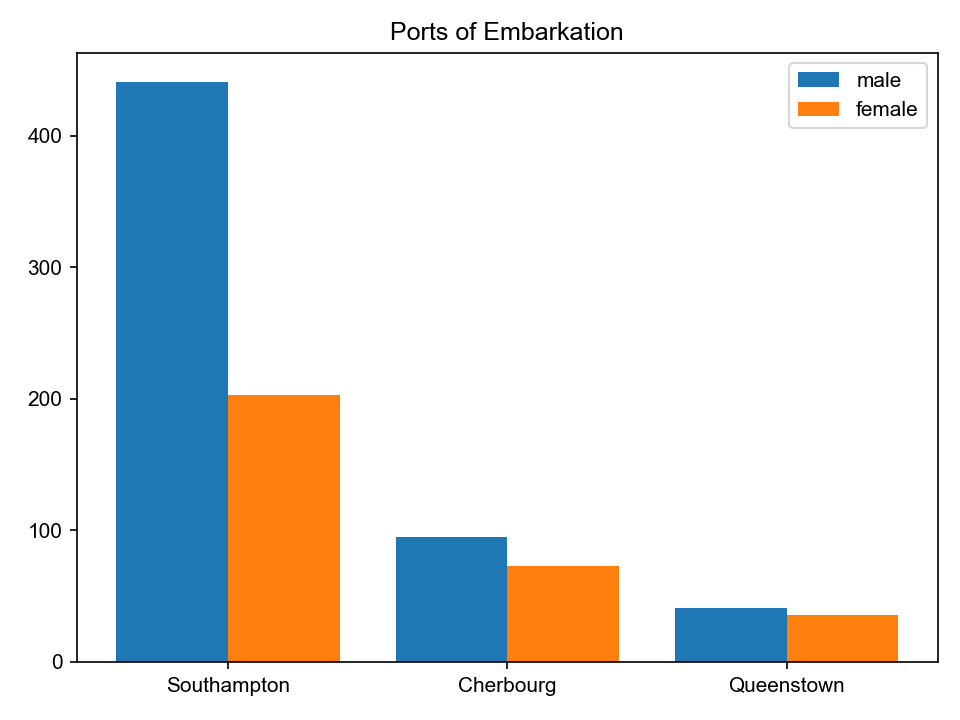

In [12]:
answer_five(df)

## Question 6
Plot histograms of the *Age* of the passengers for both men and women.

For this part you should have one figure with two axes that have two rows and one column.

The first row is the histogram of the men with six bins, and in the second row, you should plot the same histogram for women.

These two different axes should have the same x and y range.

This function should return a **figure with 2 axes**.

In [13]:
def answer_six(df):
    

    age_male = df[df['Sex']=='male']['Age']
    age_female = df[df['Sex']=='female']['Age']
    
    plt.figure()
    plt.style.use('seaborn')
    plt.subplot(211)
    plt.hist(age_male , bins=6 , color='dodgerblue')
    plt.xlim([0,80])
    plt.ylim([0,290])
    plt.title('Male Histogram')
    
    plt.subplot(212)
    plt.hist(age_female , bins=6 , color='red')
    plt.title('Female Histogram')
    plt.xlim([0,80])
    plt.ylim([0,290])    
    plt.tight_layout() 
    plt.show()

<IPython.core.display.Javascript object>


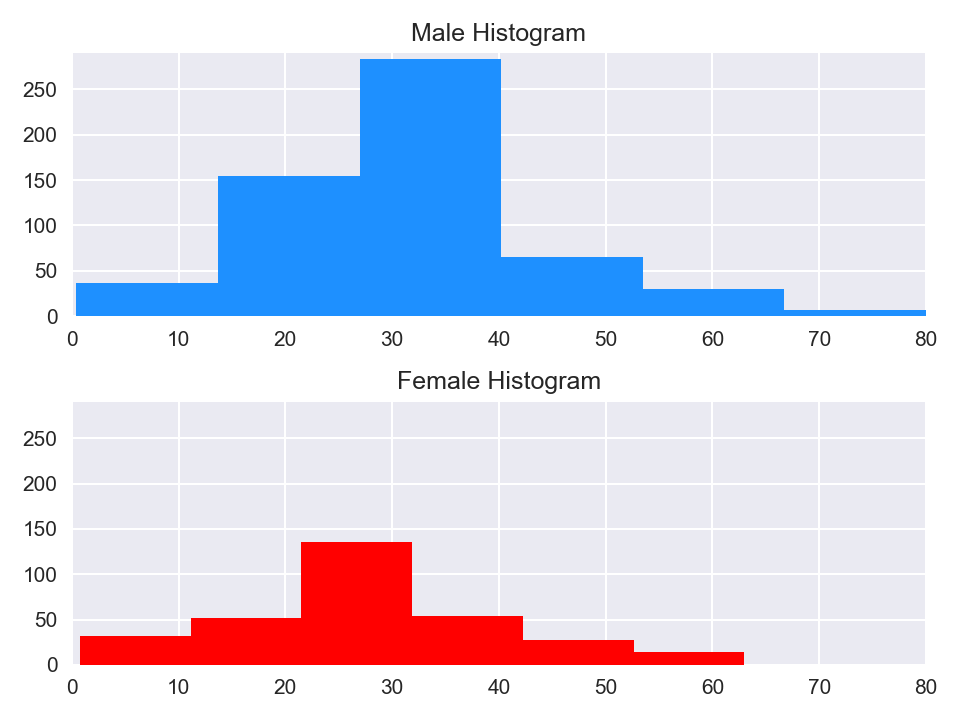

In [14]:
answer_six(df)

## Question 7
Plot a pie chart for the percentage of first, second and third class passengers in Titanic.

Include the percentage in each slice.

Set the size of the figure to (7 , 5).

Add **necessary** components to your plot. (This part has score, so do your best.)

This function should return a **figure**.

In [15]:
def answer_seven(df):
    
    first_class = len(df[df['Pclass']==1])/len(df)
    second_class = len(df[df['Pclass']==2])/len(df)
    third_class = len(df[df['Pclass']==3])/len(df)
    
    plt.figure(figsize=(7,5))
    slices=[first_class , second_class , third_class]
    labels=['1st class' , '2nd class' , '3rd class']
    plt.pie(slices , labels=labels , shadow=True , startangle=90 , autopct='%1.1f%%' , wedgeprops={'edgecolor':'black'})
    plt.title('Classes' , fontsize=18)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


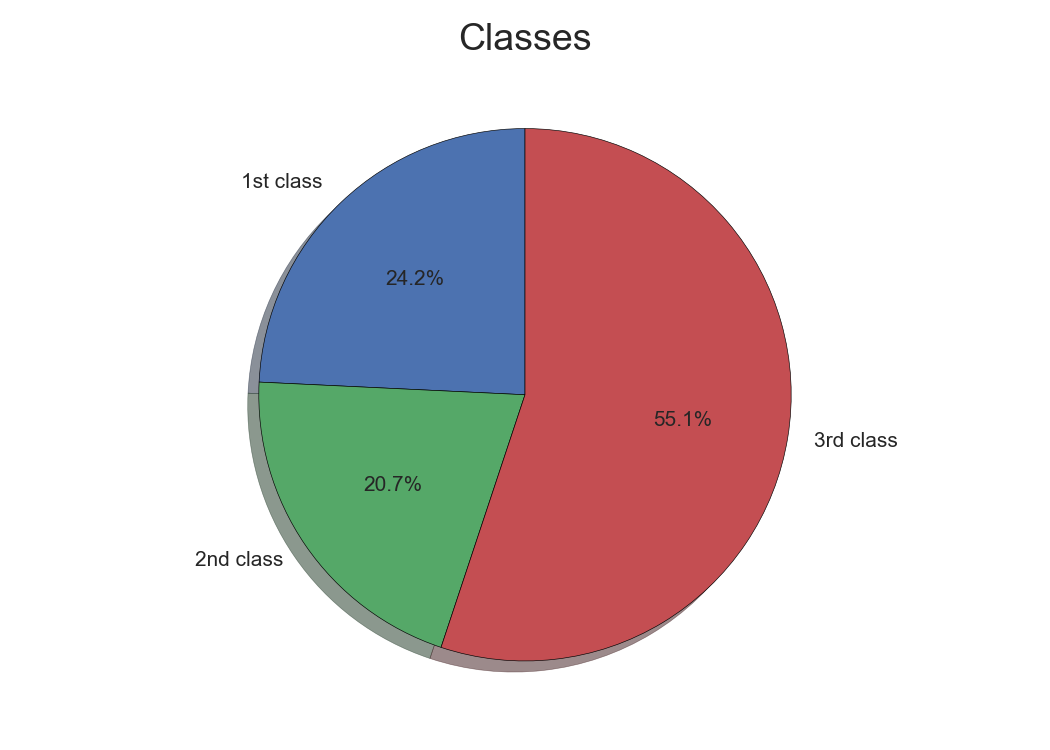

In [16]:
answer_seven(df)

## Question 8
Plot the boxplot for *Age*. Calculate the percentage of outliers (#outliers/#rows) (you should familiarize yourslef with a measure called IQR), skewness and kurtosis of this variable (*Age*).

Also turn the xticks off and add the median value besides the median line with two decimals.

This function should return a **figure of boxplot for Age that has no xticks and the value of median is shown near to the median line, in the title of this figure, you should specify the percentage of outliers (2 decimal points), skewness and kurtosis (sample title: "Age boxplot, outliers=0.45, skewness=1.00, kurtosis=1.00"**).

In [17]:
def answer_eight(df):
    
    Q1 , median ,Q3 = np.quantile(df['Age'] , [0.25 ,0.5 , 0.75])
    IQR = Q3-Q1
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR
    fliers = np.around(sum( (df['Age']<min_IQR) | (df['Age']>max_IQR) )/len(df) , decimals =2)
    
    kurtosis = np.around(stats.kurtosis(df['Age']) , decimals=2)
    skewness = np.around(stats.skew(df['Age']) , decimals=2)
    
    plt.figure()
    plt.style.use('seaborn')
    plt.boxplot(df['Age'] ,showfliers= True )
    plt.text(x=1-0.13,y=median , s='{}'.format(np.around(median,decimals=2)))
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title("Age boxplot, outliers={}, skewness={}, kurtosis={}".format(fliers , skewness ,kurtosis ))
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


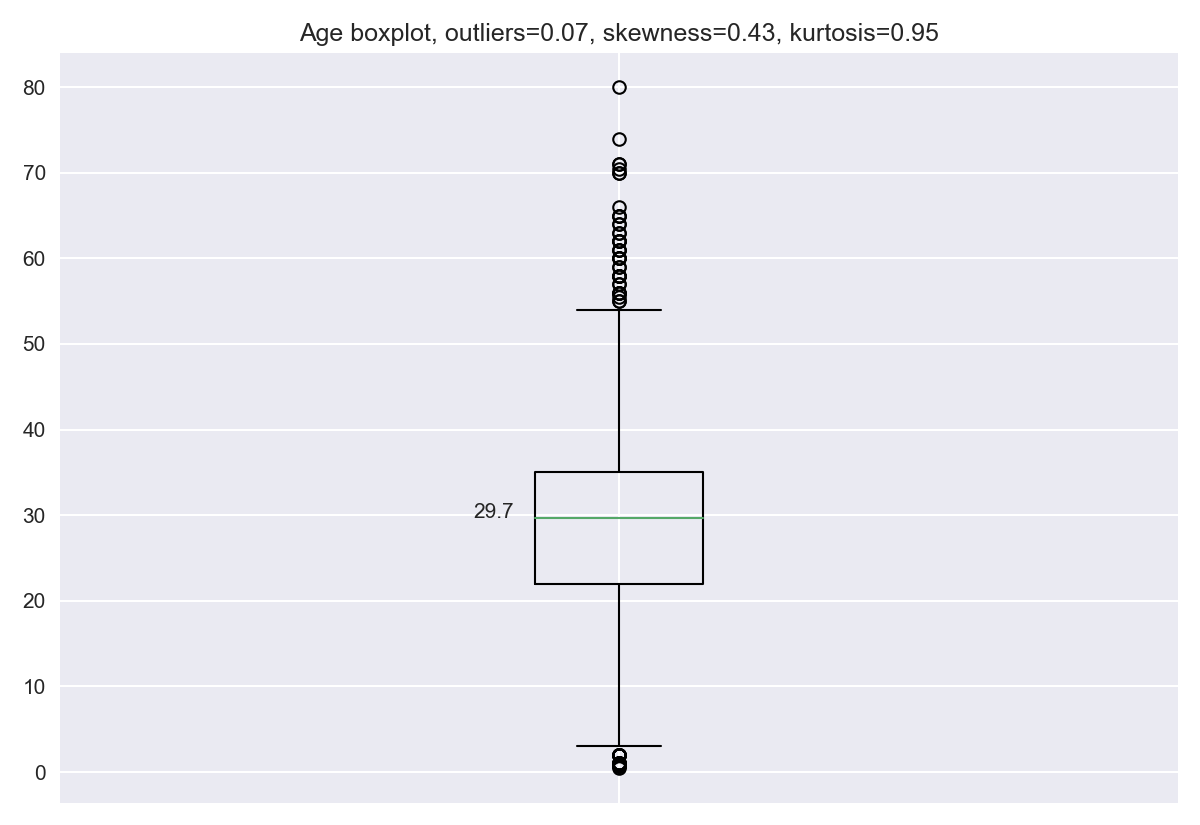

In [18]:
answer_eight(df)